In [32]:
from corpus import Corpus

In [33]:
corpus = Corpus.from_file('data/train.json')

In [34]:
corpus.build_vectors()

In [35]:
corpus.build_naive()

In [36]:
corpus.class_total_occurences.sum()

930982

In [37]:
a = corpus.docs[0].category

In [38]:
sum(len(list(doc.word_iterator)) for doc in corpus.docs)

930982

# Naiev

In [39]:
from naive import Naive_classifier

In [40]:
bayes = Naive_classifier(corpus)

In [41]:
bayes.set_valid('data/validation.json')

In [65]:
import time

t0 = time.time()
score = []
for alpha in np.linspace(0.1, 1, 10):
    limit = 1500
    score.append(sum(bayes.evaluate(limit=limit, alpha=alpha)) / limit)
t1 = time.time()

total = t1-t0
total

6.574328899383545

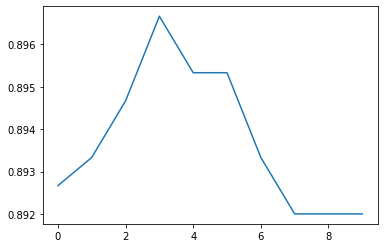

In [66]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(len(score)), score)

# KNN

In [4]:
from knn import KNN
knn = KNN(corpus)

In [5]:
knn.set_valid('data/validation.json')

In [25]:
# %%timeit
import time

t0 = time.time()
limit = 50
log = dict()
success = dict()
for k in [1, 3, 5]:
    log[k] = knn.evaluate(limit=limit, division_factor=1, k=k)
    success[k] = sum(log[k])
t1 = time.time()

total = t1-t0
total

120.54609990119934

In [26]:
success

{1: 45, 3: 44, 5: 46}

In [27]:
log

{1: [True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  False,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  False,
  True,
  False,
  True,
  True,
  True,
  True,
  True,
  False,
  True,
  False,
  True,
  True],
 3: [True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  False,
  False,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  False,
  True,
  True,
  True,
  False,
  True,
  False,
  True,
  True,
  True,
  True,
  True,
  False,
  True,
  True,
  True,
  True],
 5: [True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  True,
  False,
 